In [ ]:
!pip install simglucose gym numpy matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.8/157.8 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 984.0/984.0 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.2 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.9.4-py3-none-any.whl size=215456 sha256=c1e1986b9d594fed2a33c7146fe514b5324949426260ee4349e1358923acb8eb
  Stored in directory: /root/.cache/pip/wheels/58/15/94/ba557fc2d79dc47517afe5718a773590e1dd90ec74ccd3d38a
Successfully built gym
  Attempting uninstall: gymnasium
    Found ex

In [ ]:
from simglucose.simulation.env import T1DSimEnv
from simglucose.controller.basal_bolus_ctrller import BBController
from simglucose.sensor.cgm import CGMSensor
from simglucose.actuator.pump import InsulinPump
from simglucose.patient.t1dpatient import T1DPatient
from simglucose.simulation.scenario_gen import RandomScenario
from simglucose.simulation.scenario import CustomScenario
from simglucose.simulation.sim_engine import SimObj, sim, batch_sim
from datetime import timedelta
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd

Process ID: 410
Simulation starts ...
Simulation Completed!


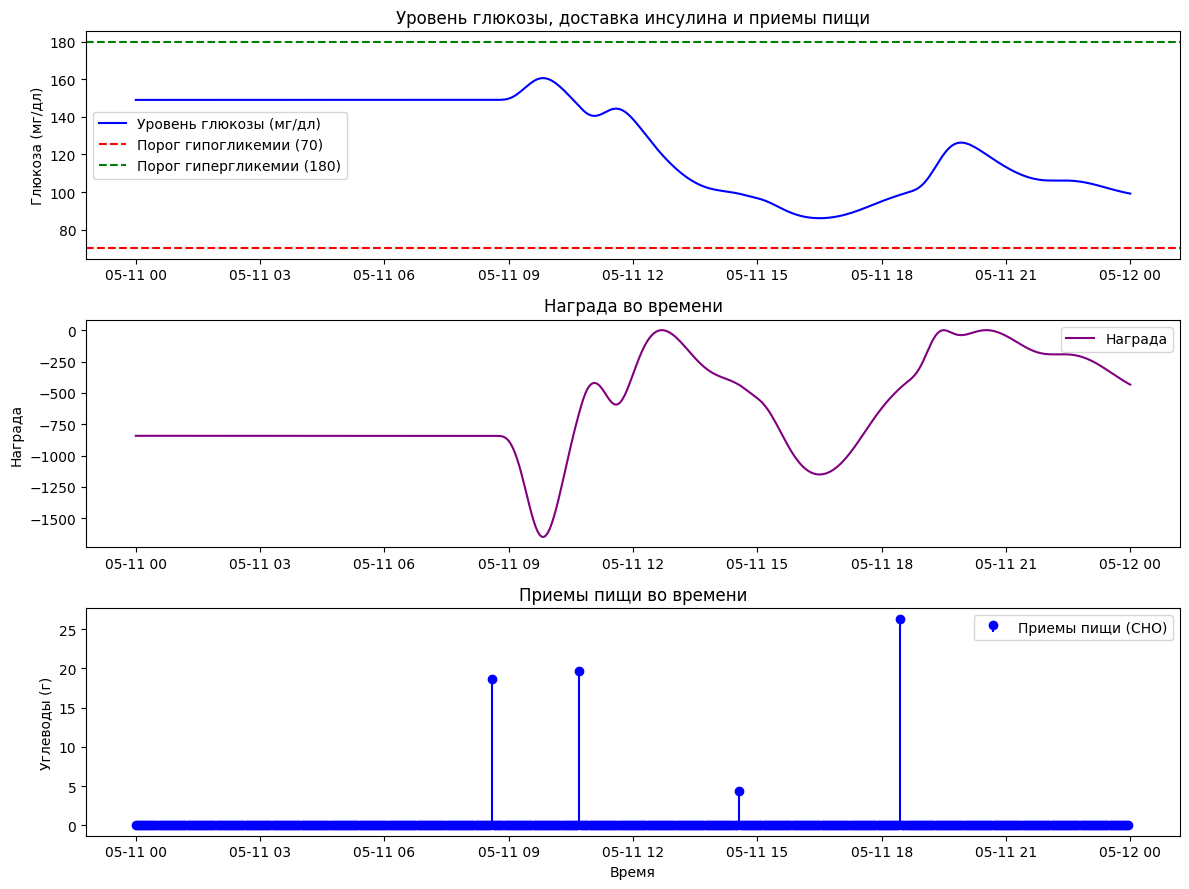

In [ ]:
now = datetime.now()
start_time = datetime.combine(now.date(), datetime.min.time())

patient = T1DPatient.withName('adolescent#001') # Инициализация пациента
sensor = CGMSensor.withName('Dexcom', seed=1) # Инициализация сенсора
pump = InsulinPump.withName('Insulet') # Инициализация помпы
scenario = RandomScenario(start_time=start_time, seed=1) # Инициализация сценария питания
env = T1DSimEnv(patient, sensor, pump, scenario) # Создание симуляционной среды

# Функция расчета награды
def calculate_reward(Gt, insulin, prev_insulin):
    if 70 <= Gt <= 180:
        return -(Gt - 120)**2
    elif Gt < 70:
        return -1000
    elif Gt > 180:
        return -(Gt - 180)**2
    return -0.1 * (insulin - prev_insulin)**2  # Разница в доставке инсулина

controller = BBController()
path = './results'
s1 = SimObj(env, controller, timedelta(days=1), animate=False, path=path)
results1 = sim(s1)
timestamps = [start_time + timedelta(minutes=i*3) for i in range(len(results1))]
results1['Time'] = timestamps

# Добавление награды в результаты
results1['Reward'] = [calculate_reward(results1['BG'].iloc[i], results1['insulin'].iloc[i],
                                     results1['insulin'].iloc[max(0, i-1)]) for i in range(len(results1))]

# Визуализация результатов
plt.figure(figsize=(12, 9))  # Увеличиваем размер фигуры для третьего графика

# График уровня глюкозы
plt.subplot(3, 1, 1)  # Теперь 3 строки, 1 колонка
plt.plot(results1['Time'], results1['BG'], label='Уровень глюкозы (мг/дл)', color='blue')
plt.axhline(y=70, color='red', linestyle='--', label='Порог гипогликемии (70)')
plt.axhline(y=180, color='green', linestyle='--', label='Порог гипергликемии (180)')
plt.ylabel('Глюкоза (мг/дл)')
plt.title('Уровень глюкозы, доставка инсулина и приемы пищи')
plt.legend()

# График награды
plt.subplot(3, 1, 2)
plt.plot(results1['Time'], results1['Reward'], label='Награда', color='purple')
plt.ylabel('Награда')
plt.title('Награда во времени')
plt.legend()

# График приемов пищи (CHO)
plt.subplot(3, 1, 3)
plt.stem(results1['Time'], results1['CHO'], label='Приемы пищи (CHO)', linefmt='b-', markerfmt='bo', basefmt=' ')
plt.ylabel('Углеводы (г)')
plt.xlabel('Время')
plt.title('Приемы пищи во времени')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Install dependencies (run in your shell)
!pip install simglucose stable-baselines3 gym

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 776.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pip install shimmy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 0.29.1
    Uninstalling gymnasium-0.29.1:
      Successfully uninstalled gymnasium-0.29.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
simglucose 0.2.11 requires gymnasium~=0.29.1, but you have gymnasium 1.1.1 which is incompatible.


In [ ]:
import gym
import numpy as np
from gym import spaces
from simglucose.simulation.env import T1DSimEnv
from simglucose.sensor.cgm import CGMSensor
from simglucose.actuator.pump import InsulinPump
from simglucose.patient.t1dpatient import T1DPatient
from simglucose.simulation.scenario_gen import RandomScenario
from datetime import datetime
from simglucose.controller.base import Action
from stable_baselines3 import DQN
from simglucose.controller.base import Controller, Action
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

In [ ]:
import numpy as np
from gym import Env, spaces
from datetime import datetime

class SimpleT1DEnv(gym.Env):
    def __init__(self):
        super().__init__()

        self.env = T1DSimEnv(
            T1DPatient.withName('adolescent#001'),
            CGMSensor.withName('Dexcom', seed=1),
            InsulinPump.withName('Insulet'),
            RandomScenario(start_time=start_time, seed=1)
        )

        self.doses = np.array([0.0, 0.25, 0.5, 0.75, 1.0, 1.5, 2.0])
        self.action_space = spaces.Discrete(len(self.doses))
        self.observation_space = spaces.Box(low=0, high=1, shape=(1,))
        self.observation_space.dtype = np.float32

    def reset(self):
        step_result = self.env.reset()
        bg = float(step_result.observation.CGM)
        return np.array([bg / 500.0], dtype=np.float32)

    def step(self, action_idx):
        dose = self.doses[action_idx]
        action = Action(basal=0.0, bolus=dose)
        step_result = self.env.step(action)
        bg = float(step_result.observation.CGM)

        reward = self.calculate_reward(bg)  # ← Используем новую функцию

        obs = np.array([bg / 500.0], dtype=np.float32)
        done = bg < 40 or bg > 350
        return obs, reward, done, step_result.info  # ← добавим info, если оно тебе пригодится

    def calculate_reward(self, bg: float) -> float:
        """Расчет награды на основе уровня глюкозы"""
        target_min, target_max = 70, 180
        severe_hypo, hyper_threshold = 54, 250
        optimal_bg = 110

        if bg < severe_hypo:
            return -20.0
        elif bg < target_min:
            return -5.0 - 0.5 * (target_min - bg)
        elif bg > hyper_threshold:
            return -5.0 - 0.1 * (bg - hyper_threshold)
        elif bg > target_max:
            return -2.0 - 0.05 * (bg - target_max)
        else:
            deviation = abs(bg - optimal_bg)
            max_deviation = max(optimal_bg - target_min, target_max - optimal_bg)
            return 10.0 * (1 - (deviation / max_deviation) ** 2)

    def render(self, mode='human'):
        pass

In [ ]:
import numpy as np
from gym import spaces
from collections import deque
from simglucose.simulation.scenario import Scenario
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [ ]:
now = datetime.now()
start_time = datetime.combine(now.date(), datetime.min.time())

patient = T1DPatient.withName('adolescent#001') # Инициализация пациента
sensor = CGMSensor.withName('Dexcom', seed=1) # Инициализация сенсора
pump = InsulinPump.withName('Insulet') # Инициализация помпы
scenario = RandomScenario(start_time=start_time, seed=1) # Инициализация сценария питания
sim_env = T1DSimEnv(patient, sensor, pump, scenario) # Создание симуляционной среды

In [ ]:
import numpy as np
from gym import spaces
from collections import deque

class SafeT1DEnv(gym.Env):
    def __init__(self, history_length=10, env=None):
        super().__init__()

        self.env = env
        # Упрощенные действия: 0 - не колоть, 1 - минимальная доза (0.1), 2 - средняя доза (0.5)
        self.doses = np.array([0.0, 0.1, 0.5])
        self.action_space = spaces.Discrete(len(self.doses))

        self.observation_space = spaces.Box(
            low=0,
            high=1,
            shape=(1 + history_length + 1,)  # [глюкоза, история, активный инсулин]
        )
        self.observation_space.dtype = np.float32

        # Параметры
        self.history_length = history_length
        self.glucose_history = deque(maxlen=history_length)
        self.active_insulin = 0.0
        self.insulin_decay = 0.8  # Коэффициент распада инсулина

    def reset(self):
        step_result = self.env.reset()
        bg = float(step_result.observation.CGM)
        self.glucose_history = deque([bg] * self.history_length, maxlen=self.history_length)
        self.active_insulin = 0.0
        return self._get_obs(bg)

    def step(self, action_idx):
        current_bg = float(self.glucose_history[-1])

        # Автоматическая блокировка инсулина при гипогликемии
        if current_bg < 70:
            action_idx = 0  # Принудительно не колем

        # Автоматическое введение при сильной гипергликемии
        elif current_bg > 250:
            action_idx = 2  # Принудительно средняя доза

        dose = self.doses[action_idx]
        action = Action(basal=0.0, bolus=dose)

        # Обновляем активный инсулин
        self.active_insulin = self.active_insulin * self.insulin_decay + dose

        # Шаг основной среды
        step_result = self.env.step(action)
        new_bg = float(step_result.observation.CGM)
        self.glucose_history.append(new_bg)

        # Расчет награды с учетом безопасности
        reward = self._calculate_safe_reward(new_bg, dose)

        done = new_bg < 40 or new_bg > 350
        obs = self._get_obs(new_bg)

        return obs, reward, done, step_result.info

    def _calculate_safe_reward(self, bg, dose):
        """Награда, поощряющая безопасное поведение"""
        if bg < 70:
            return -10.0  # Большой штраф за гипо
        elif bg > 180:
            return -1.0 * (bg - 180) / 50  # Штраф пропорциональный гипергликемии
        else:
            # Поощрение за нахождение в целевом диапазоне
            target = 100
            return 1.0 - 0.01 * abs(bg - target) - 0.1 * dose  # Штраф за лишний инсулин

    def _get_obs(self, bg):
        """Нормализованное наблюдение"""
        return np.array([
            bg / 500.0,
            *[x / 500.0 for x in self.glucose_history],
            min(self.active_insulin / 5.0, 1.0)
        ], dtype=np.float32)

In [ ]:
class SafeT1DEnv(gym.Env):
    def __init__(self, history_length=10, env=None):
        super().__init__()
        self.env = env
        # Более безопасные дозы с меньшим шагом
        self.doses = np.array([0.0, 0.05, 0.1, 0.2])
        self.action_space = spaces.Discrete(len(self.doses))

        # Расширенное пространство наблюдений (добавлен тренд глюкозы)
        self.observation_space = spaces.Box(
            low=0,
            high=1,
            shape=(1 + history_length + 2,)  # [глюкоза, история, активный инсулин, тренд]
        )
        self.observation_space.dtype = np.float32

        # Параметры
        self.history_length = history_length
        self.glucose_history = deque(maxlen=history_length)
        self.active_insulin = 0.0
        self.insulin_decay = 0.85  # Более медленный распад инсулина

    def reset(self):
        step_result = self.env.reset()
        bg = float(step_result.observation.CGM)
        self.glucose_history = deque([bg] * self.history_length, maxlen=self.history_length)
        self.active_insulin = 0.0
        return self._get_obs(bg)

    def step(self, action_idx):
        current_bg = float(self.glucose_history[-1])
        trend = self._calculate_trend()  # Рассчитываем тренд глюкозы

        # Автоматическая блокировка инсулина в опасных ситуациях
        if current_bg < 80 or (current_bg < 120 and trend < -0.5):  # Если глюкоза падает
            action_idx = 0  # Полностью отключаем инсулин

        # Умеренная коррекция при гипергликемии без резкого падения
        elif current_bg > 180 and trend >= -0.3:  # Если глюкоза растет/стабильна
            action_idx = min(action_idx + 1, len(self.doses)-1)  # Увеличиваем дозу
        else:
            action_idx = max(action_idx - 1, 0)  # Уменьшаем дозу

        dose = self.doses[action_idx]
        action = Action(basal=0.0, bolus=dose)

        # Обновляем активный инсулин
        self.active_insulin = self.active_insulin * self.insulin_decay + dose

        # Шаг основной среды
        step_result = self.env.step(action)
        new_bg = float(step_result.observation.CGM)
        self.glucose_history.append(new_bg)

        # Улучшенная система наград
        reward = self._calculate_improved_reward(new_bg, trend, dose)

        done = new_bg < 40 or new_bg > 350
        obs = self._get_obs(new_bg)

        return obs, reward, done, step_result.info

    def _calculate_trend(self):
        """Рассчитывает тренд глюкозы (мг/дл в минуту)"""
        if len(self.glucose_history) < 2:
            return 0.0
        return (self.glucose_history[-1] - self.glucose_history[-2]) / 5  # 5 минут между измерениями

    def _calculate_improved_reward(self, bg, trend, dose):
        """Улучшенная функция награды"""
        # Критические состояния
        if bg < 70:
            return -20.0
        elif bg > 250:
            return -10.0

        # Идеальный диапазон
        if 80 <= bg <= 140:
            stability_bonus = 2.0 if abs(trend) < 0.3 else 0.0  # Бонус за стабильность
            return 5.0 + stability_bonus - dose * 0.5

        # Пограничные зоны
        if bg < 80:
            return -2.0 * (80 - bg) - abs(trend) * 5
        if bg > 180:
            return -0.5 * (bg - 180) + min(trend * 2, 0)  # Меньший штраф если глюкоза падает

        return 1.0 - dose * 0.2  # Базовая награда

    def _get_obs(self, bg):
        """Расширенное наблюдение с трендом"""
        trend = self._calculate_trend()
        return np.array([
            bg / 500.0,  # Текущая глюкоза
            *[x / 500.0 for x in self.glucose_history],  # История глюкозы
            min(self.active_insulin / 5.0, 1.0),  # Активный инсулин
            np.clip(trend / 5.0, -1, 1)  # Нормализованный тренд
        ], dtype=np.float32)

In [ ]:
env = DummyVecEnv([lambda: SafeT1DEnv(env=sim_env)])

# Создаем и обучаем модель DQN
model = DQN(
    "MlpPolicy",      # Используем многослойную нейронную сеть
    env,              # Среда
    verbose=1,        # Печать информации о процессе обучения
    learning_rate=1e-3,
    buffer_size=50000, # Размер буфера
    batch_size=64,     # Размер мини-батча
    gamma=0.99,        # Коэффициент дисконтирования
)

# Обучение модели
model.learn(total_timesteps=10000, progress_bar=True)

# Сохраняем модель
model.save("dqn_glucose_controller")

Output()

/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:235: UserWarning: WARN: Box low's precision lowered by casting to float32, current low.dtype=float64
  gym.logger.warn(
/usr/local/lib/python3.11/dist-packages/gymnasium/spaces/box.py:305: UserWarning: WARN: Box high's precision lowered by casting to float32, current high.dtype=float64
  gym.logger.warn(


Using cpu device
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 84       |
|    time_elapsed     | 48       |
|    total_timesteps  | 4087     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.5      |
|    n_updates        | 996      |
----------------------------------
----------------------------------
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 89       |
|    time_elapsed     | 79       |
|    total_timesteps  | 7125     |
| train/              |          |
|    learning_rate    | 0.001    |
|    loss             | 1.23     |
|    n_updates        | 1756     |
----------------------------------
----------------------------------
| rollout/            |          |
|  

In [ ]:
env = DummyVecEnv([lambda: SafeT1DEnv(env=sim_env)])

In [ ]:
import numpy as np
from datetime import datetime, timedelta

class DQNController(Controller):
    def __init__(self, model_path):
        super().__init__(None)
        self.model = DQN.load(model_path, env=env)
        self.doses = np.array([0.0, 0.05, 0.1, 0.2])
        self.rewards_history = []
        self.doses_history = []
        self.timestamps = []
        self.current_time = datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)

    def policy(self, observation, reward, done, **info):
        self.rewards_history.append(reward)
        self.timestamps.append(self.current_time)
        self.current_time += timedelta(minutes=5)

        # Универсальный способ извлечения уровня глюкозы
        glucose = self._extract_glucose(observation)

        # Подготовка observation для модели
        obs = self._prepare_observation(glucose)

        # Получение действия от модели
        action_idx = self._get_action_index(obs)

        bolus = float(self.doses[action_idx])
        self.doses_history.append(bolus)

        return Action(basal=0.0, bolus=bolus)

    def _extract_glucose(self, observation):
        """Извлекает уровень глюкозы из observation в любом формате"""
        try:
            # Если observation - объект с атрибутом CGM
            return float(observation.CGM)
        except AttributeError:
            if isinstance(observation, (np.ndarray, list)):
                # Если observation - массив/список, берем первый элемент
                return float(observation.flat[0])  # .flat работает для любых размерностей
            elif isinstance(observation, (float, int)):
                # Если observation - просто число
                return float(observation)
            else:
                raise ValueError(f"Unsupported observation type: {type(observation)}")

    def _prepare_observation(self, glucose):
        """Подготавливает observation для модели"""
        return np.array([[glucose]], dtype=np.float32)  # Формат (1, 1)

    def _get_action_index(self, obs):
        """Получает индекс действия от модели"""
        action_idx, _ = self.model.predict(obs, deterministic=True)
        return int(action_idx[0]) if isinstance(action_idx, (np.ndarray, list)) else int(action_idx)

    def reset(self):
        self.rewards_history.clear()
        self.doses_history.clear()
        self.timestamps.clear()
        self.current_time = datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)

In [ ]:
controller = DQNController(model_path="dqn_glucose_controller")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Инициализация
glucose_levels = []
rewards_history = []
doses_history = []
timestamps = [datetime.now().replace(hour=0, minute=0, second=0, microsecond=0)]

# Сброс среды и получение начального наблюдения
obs = env.reset()

for i in range(288):  # 24 часа с шагом 5 минут
    current_time = timestamps[-1]

    # Подготовка observation
    if isinstance(obs, (np.ndarray, list)):
        processed_obs = np.array(obs).flatten()
    else:
        try:
            processed_obs = np.array([obs.CGM, obs.active_insulin, obs.time_since_last_meal], dtype=np.float32)
        except AttributeError:
            processed_obs = np.array([float(obs)], dtype=np.float32)

    if processed_obs.shape != (5,):
        processed_obs = np.pad(processed_obs, (0, max(0, 5 - len(processed_obs))), mode='constant')

    try:
        action_idx, _ = controller.model.predict(processed_obs.reshape(1, -1), deterministic=True)
        action_idx = int(np.clip(action_idx[0], 0, len(controller.doses) - 1))
        bolus = controller.doses[action_idx]
        action = Action(basal=0.0, bolus=bolus)

        next_obs, reward, done, info = env.step([action_idx])

        try:
            glucose = float(np.array(next_obs).flatten()[0]) * 500.0  # Денормализация
        except:
            glucose = np.nan

        glucose_levels.append(glucose)
        rewards_history.append(reward)
        doses_history.append(bolus)
        timestamps.append(current_time + timedelta(minutes=5))

        obs = next_obs

        if done:
            break

    except Exception as e:
        print(f"Ошибка на шаге {i}: {str(e)}")
        break

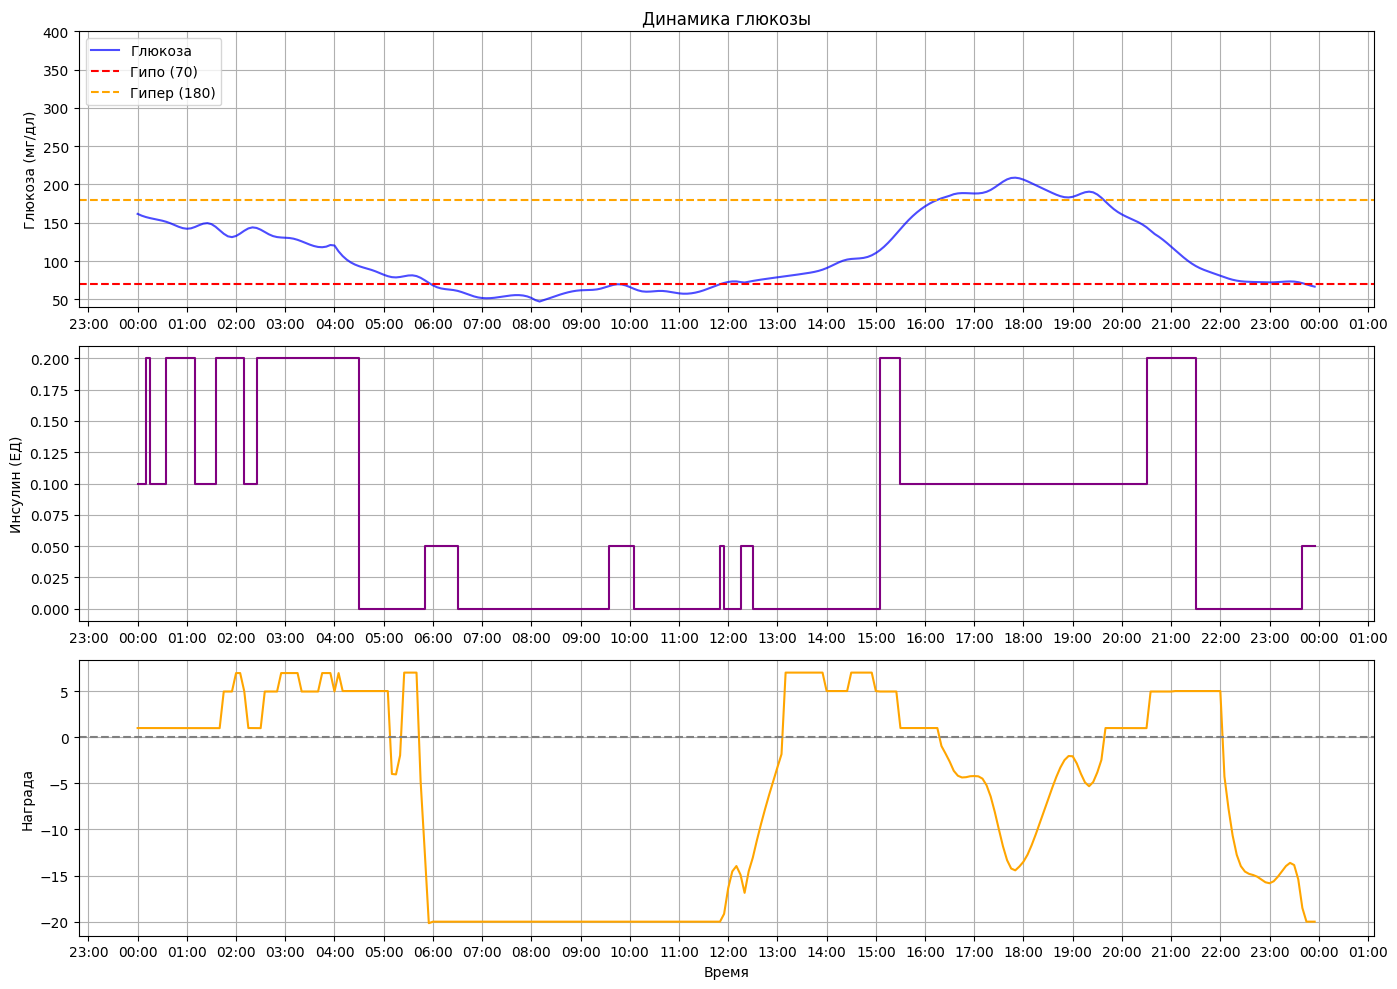

In [ ]:
import matplotlib.dates as mdates  # Импорт модуля для работы с датами

# Визуализация
plt.figure(figsize=(14, 10))

# 1. Уровень глюкозы
plt.subplot(3, 1, 1)
plt.plot(timestamps[:-1], glucose_levels, label='Глюкоза', color='blue', alpha=0.7)
plt.axhline(y=70, color='red', linestyle='--', label='Гипо (70)')
plt.axhline(y=180, color='orange', linestyle='--', label='Гипер (180)')
plt.ylabel('Глюкоза (мг/дл)')
plt.ylim(40, 400)
plt.title('Динамика глюкозы')
plt.legend(loc='upper left')
plt.grid(True)

# Настройка оси времени: деления через каждый час
ax = plt.gca()  # Получаем текущую ось
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Деления каждый час
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Формат "ЧЧ:ММ"

# 2. Доза инсулина
plt.subplot(3, 1, 2)
plt.step(timestamps[:-1], doses_history, label='Инсулин', color='purple', where='post')
plt.ylabel('Инсулин (ЕД)')
plt.grid(True)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# 3. Награды агента
plt.subplot(3, 1, 3)
plt.plot(timestamps[:-1], rewards_history, label='Награда', color='orange')
plt.axhline(0, color='grey', linestyle='--')
plt.ylabel('Награда')
plt.xlabel('Время')
plt.grid(True)
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.tight_layout()
plt.show()

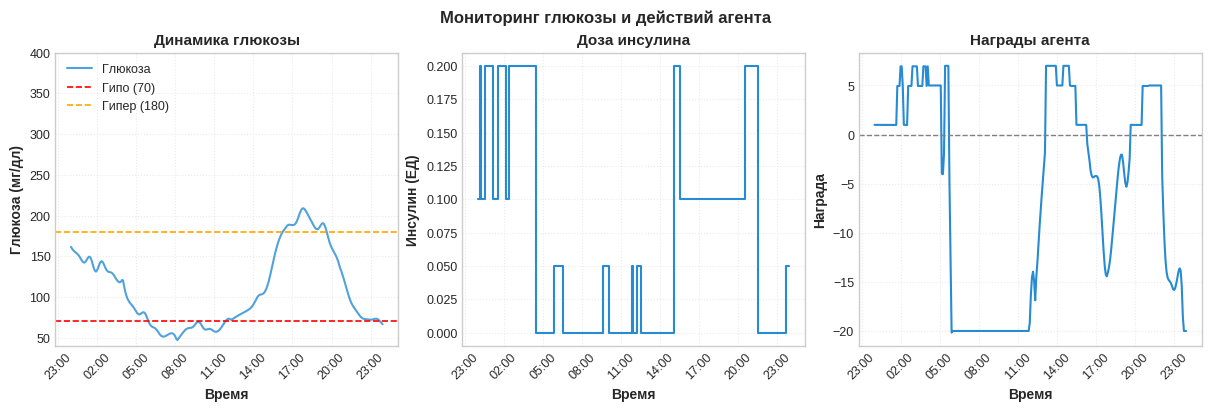

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Создаём Figure с тремя графиками в строке
fig, axes = plt.subplots(
    1, 3,  # 1 строка, 3 столбца
    figsize=(12, 4),            # шире, но ниже
    sharex=False,               # общий X-axis не нужен в горизонтальном расположении
    constrained_layout=True,    # автоматическая подгонка отступов
    dpi=100                     # увеличиваем базовое разрешение
)

# Увеличиваем толщину линий и шрифтов
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9

# 1. Уровень глюкозы
axes[0].plot(timestamps[:-1], glucose_levels, label='Глюкоза', alpha=0.8)
axes[0].axhline(70, color='red', linestyle='--', label='Гипо (70)', linewidth=1.2)
axes[0].axhline(180, color='orange', linestyle='--', label='Гипер (180)', linewidth=1.2)
axes[0].set_ylabel('Глюкоза (мг/дл)', fontweight='bold')
axes[0].set_xlabel('Время', fontweight='bold')
axes[0].set_ylim(40, 400)
axes[0].legend(loc='upper left', frameon=False)
axes[0].grid(True, linestyle=':', linewidth=0.8)
axes[0].set_title('Динамика глюкозы', fontweight='bold')

# 2. Доза инсулина
axes[1].step(timestamps[:-1], doses_history, where='post', linewidth=1.5)
axes[1].set_ylabel('Инсулин (ЕД)', fontweight='bold')
axes[1].set_xlabel('Время', fontweight='bold')
axes[1].grid(True, linestyle=':', linewidth=0.8)
axes[1].set_title('Доза инсулина', fontweight='bold')

# 3. Награды агента
axes[2].plot(timestamps[:-1], rewards_history, linewidth=1.5)
axes[2].axhline(0, color='grey', linestyle='--', linewidth=1.0)
axes[2].set_ylabel('Награда', fontweight='bold')
axes[2].set_xlabel('Время', fontweight='bold')
axes[2].grid(True, linestyle=':', linewidth=0.8)
axes[2].set_title('Награды агента', fontweight='bold')

# Форматирование времени - метки каждые 3 часа
for ax in axes:
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))  # Каждые 3 часа
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax.tick_params(axis='x', labelrotation=45)

# Общий заголовок
fig.suptitle('Мониторинг глюкозы и действий агента', fontsize=12, fontweight='bold')

# Сохраняем с высоким DPI
plt.savefig('horizontal_plot_3h.png', dpi=300, bbox_inches='tight')
plt.show()